In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
df1 = pd.read_csv(r'C:\Users\aacjp\flatiron\mod1-case-study-eda\data\googleplaystore.csv')
df2 = pd.read_csv(r'C:\Users\aacjp\flatiron\mod1-case-study-eda\data\googleplaystore_user_reviews.csv')
df1.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [12]:
category_list = list(df1['Category'].unique())[:-1]
n = len(category_list)
avg_ratings = []
for i in range(n):
    avg_ratings.append(df1.loc[df1['Category'] == category_list[i]]['Rating'].mean())
    
ix = avg_ratings.index(max(avg_ratings))
best_rated_category = category_list[ix]
best_rated_category, round(avg_ratings[ix], 2)
df1.loc[df1['Category'] == 'EVENTS']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1004,All Events in City,EVENTS,4.0,3782,9.5M,"100,000+",Free,0,Everyone,Events,"June 12, 2018",8.4,4.0.3 and up
1005,Ticketmaster Event Tickets,EVENTS,4.0,40113,36M,"5,000,000+",Free,0,Everyone,Events,"July 23, 2018",Varies with device,Varies with device
1006,Reminder,EVENTS,4.5,7074,6.3M,"500,000+",Free,0,Everyone,Events,"June 25, 2018",1.57,4.1 and up
1007,Birdays - Birthday reminder,EVENTS,4.5,2153,5.9M,"50,000+",Free,0,Everyone,Events,"December 14, 2017",1.5.0,4.1 and up
1008,"StubHub - Tickets to Sports, Concerts & Events",EVENTS,4.0,26089,Varies with device,"5,000,000+",Free,0,Everyone,Events,"August 2, 2018",4.2.1,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9659,FAST EO,EVENTS,5.0,1,Varies with device,10+,Free,0,Everyone,Events,"May 15, 2018",1.0.3,4.1 and up
9699,eP Scanner,EVENTS,NaN,0,20M,100+,Free,0,Everyone,Events,"October 13, 2017",1.5,4.4 and up
10105,EY Belgium Inhouse Day 2018,EVENTS,NaN,0,24M,10+,Free,0,Everyone,Events,"May 14, 2018",18.4.8.0,4.1 and up
10605,FL Bankers,EVENTS,NaN,0,3.4M,10+,Free,0,Everyone,Events,"June 5, 2018",1.0.1,4.2 and up


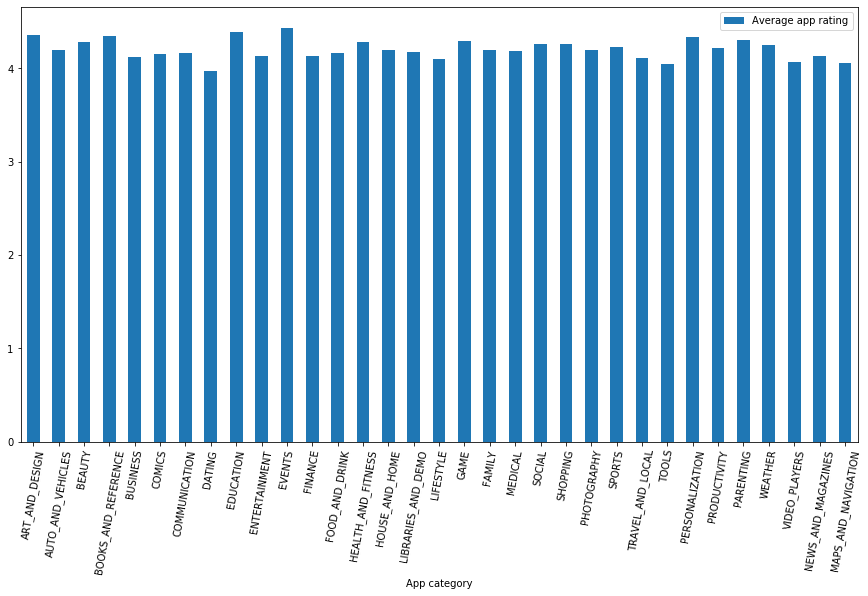

In [13]:
a = pd.DataFrame(avg_ratings)
c = pd.DataFrame(category_list)
category_ratings_df = pd.concat([c, a], axis='columns')
category_ratings_df.columns = ['App category', 'Average app rating']
category_ratings_df = category_ratings_df.set_index('App category')
category_ratings_df.plot(kind='bar', figsize=(15, 8), rot=80)

In [14]:
sizes = list(df1['Size'])
ratings = list(df1['Rating'])
#int(list(df1['Size'])[0][:-1])
n = len(sizes)
droplist = []
new_sizes = []
new_ratings = []
for i in range(n):
    if sizes[i] == 'Varies with device':
        droplist.append(i)
    else:
        new_sizes.append(sizes[i])
        new_ratings.append(ratings[i])
        
len(new_ratings), len(new_sizes)

(9146, 9146)

In [15]:
int_sizes = []
n = len(new_sizes)
for i in range(n):
    if new_sizes[i][:-1] != '1,000':
        int_sizes.append(float(new_sizes[i][:-1]))
    else:
        delete_ix = i
        new_ratings.remove(new_ratings[delete_ix])
    
len(int_sizes), len(new_ratings)
rating_df = pd.DataFrame(new_ratings).fillna(4.3)
size_df = pd.DataFrame(int_sizes)
size_df.describe()

,0
count,9145.000000
mean,37.035440
std,98.873769
min,1.000000
25%,5.600000
50%,15.000000
75%,34.000000
max,1020.000000


In [16]:
Q2df = pd.concat([size_df, rating_df], axis='columns') #[:-1]
Q2df

,0,0
0,19.0,4.1
1,14.0,3.9
2,8.7,4.7
3,25.0,4.5
4,2.8,4.3
...,...,...
9140,9.6,4.3
9141,53.0,4.5
9142,3.6,5.0
9143,9.5,4.3


Text(0.5, 1.0, 'App sizes and App ratings')

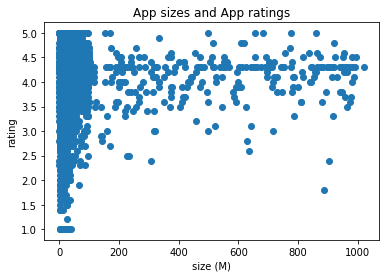

In [17]:
plt.scatter(size_df, rating_df)
plt.xlabel('size (M)')
plt.ylabel('rating')
plt.title('App sizes and App ratings')

In [18]:
# app size and app rating do have a slightly positive correlation. 
# Most of the apps in the dataset were at or under 100M, however all of the apps
# that got less than 2.5 stars were under 100M

In [19]:
temp_df = df1[:len(int_sizes)]
temp_df['Size_'] = int_sizes
temp_df['Rating_'] = new_ratings
temp_df['Rating_'] = temp_df['Rating_'].fillna(4.3)
small_apps = temp_df.loc[temp_df['Size_'] < 100]
large_apps = temp_df.loc[temp_df['Size_'] > 100]
poorly_rated_apps = temp_df.loc[temp_df['Rating_'] < 2.5]
poorly_rated_apps

C:\Users\aacjp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\aacjp\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\aacjp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_,Rating_
368,My magenta,COMMUNICATION,3.9,42370,37M,"1,000,000+",Free,0,Everyone,Communication,"June 25, 2018",7.5.1,5.0 and up,19.0,1.9
399,Glide - Video Chat Messenger,COMMUNICATION,4.3,350154,Varies with device,"10,000,000+",Free,0,Everyone,Communication,"July 29, 2018",Varies with device,Varies with device,19.0,1.9
466,free video calls and chat,COMMUNICATION,4.2,594728,Varies with device,"50,000,000+",Free,0,Everyone,Communication,"July 19, 2018",7.3(800241),4.4 and up,9.2,1.0
504,BLK - Swipe. Match. Chat.,DATING,4.1,2067,24M,"100,000+",Free,0,Mature 17+,Dating,"July 25, 2018",1.6.1,4.4 and up,19.0,1.9
1851,MARVEL Contest of Champions,GAME,4.3,2468063,92M,"50,000,000+",Free,0,Teen,Action,"July 30, 2018",19.1.0,4.0.3 and up,6.8,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8749,Monster Fishing 2018,SPORTS,4.4,32881,76M,"1,000,000+",Free,0,Everyone,Sports,"August 7, 2018",0.0.80,4.1 and up,29.0,2.1
8778,DR.MEEP,FAMILY,4.4,54,33M,500+,Paid,$2.99,Everyone,Puzzle,"June 29, 2018",1.2,4.1 and up,35.0,2.1
8879,Riptide GP: Renegade,GAME,4.7,4328,Varies with device,"100,000+",Paid,$2.99,Everyone 10+,Racing,"June 1, 2018",1.2.1,4.1 and up,26.0,1.5
8895,du app,LIFESTYLE,3.5,7578,25M,"1,000,000+",Free,0,Everyone,Lifestyle,"July 24, 2018",3.98,4.2 and up,31.0,2.0


In [20]:
#mean and median ratings for apps under and over 100M respectfully
#I chose 100M because that is the point at which the amount of apps drop off significantly and I found that more meaningful
#than the mean
small_apps['Rating_'].mean(), large_apps['Rating_'].mean()
small_apps['Rating_'].median(), large_apps['Rating_'].median()

(4.3, 4.2)

In [21]:
#looking at the poorly rated apps, I will show the mean size, median size, and max size
poorly_rated_apps['Size_'].mean(), poorly_rated_apps['Size_'].median(), max(poorly_rated_apps['Size_'])

(31.523622047244093, 9.1, 903.0)

In [22]:
list(df1['Category'].unique())

['ART_AND_DESIGN',
 'AUTO_AND_VEHICLES',
 'BEAUTY',
 'BOOKS_AND_REFERENCE',
 'BUSINESS',
 'COMICS',
 'COMMUNICATION',
 'DATING',
 'EDUCATION',
 'ENTERTAINMENT',
 'EVENTS',
 'FINANCE',
 'FOOD_AND_DRINK',
 'HEALTH_AND_FITNESS',
 'HOUSE_AND_HOME',
 'LIBRARIES_AND_DEMO',
 'LIFESTYLE',
 'GAME',
 'FAMILY',
 'MEDICAL',
 'SOCIAL',
 'SHOPPING',
 'PHOTOGRAPHY',
 'SPORTS',
 'TRAVEL_AND_LOCAL',
 'TOOLS',
 'PERSONALIZATION',
 'PRODUCTIVITY',
 'PARENTING',
 'WEATHER',
 'VIDEO_PLAYERS',
 'NEWS_AND_MAGAZINES',
 'MAPS_AND_NAVIGATION',
 '1.9']

In [23]:
games_df = df1.loc[df1['Category'] == 'GAME']
len(list(games_df['Genres'].unique()))

24

In [24]:
#there are 24 genres of game apps

In [25]:
len(games_df.loc[games_df['Genres'] == 'Arcade'])

220

In [26]:
def get_genre_counts(data, genre_var, genre):
    count = len(data.loc[data[genre_var] == genre])
    return genre, count

In [27]:
get_genre_counts(games_df, 'Genres', 'Arcade')

('Arcade', 220)

In [31]:
genres = list(games_df['Genres'].unique())
n = len(genres)
genre_list = []
count_list = []
for i in range(n):
    genre = genres[i]
    count = get_genre_counts(games_df, 'Genres', genre)[1]
    g = get_genre_counts(games_df, 'Genres', genre)[0]
    genre_list.append(g)
    count_list.append(count)
    
count_list

[5,
 220,
 45,
 48,
 1,
 365,
 24,
 42,
 14,
 22,
 29,
 98,
 1,
 1,
 11,
 75,
 44,
 38,
 16,
 1,
 3,
 1,
 1,
 39]

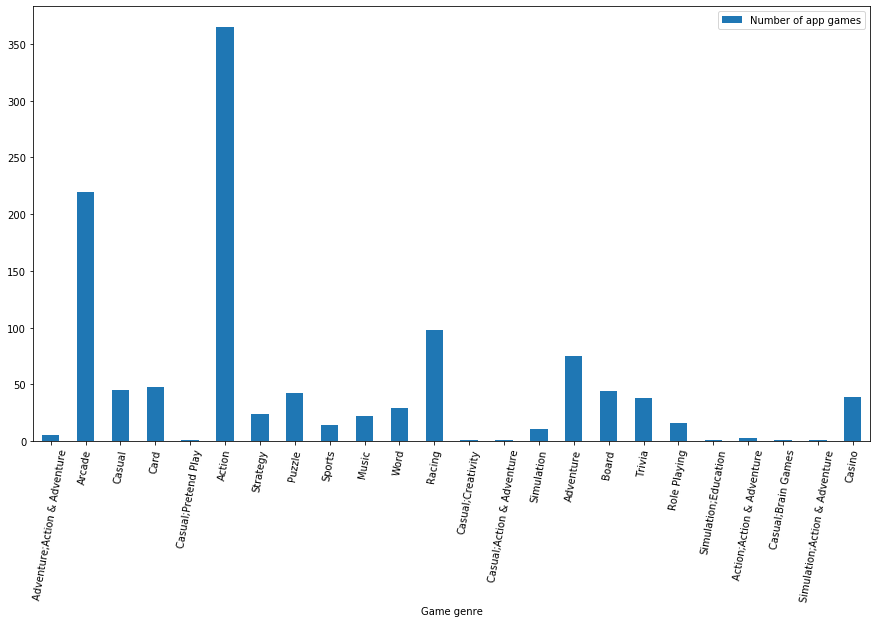

In [29]:
genre_df = pd.DataFrame(genre_list)
c = pd.DataFrame(count_list)
genre_counts_df = pd.concat([genre_df, c], axis='columns')
genre_counts_df.columns = ['Game genre', 'Number of app games']
genre_counts_df = genre_counts_df.set_index('Game genre')
genre_counts_df.plot(kind='bar', figsize=(15, 8), rot=80)

In [22]:
#I choose to investigate which genre has the highest percentage of paid apps

In [34]:
def get_percentage(data, paid_var, category_var, category):
    paid_apps = data.loc[data[paid_var] == 'Paid']
    numerator = len(paid_apps.loc[paid_apps[category_var] == category])
    denominator = len(data.loc[data[category_var] == category])
    return round(numerator / denominator * 100, 2)

In [39]:
categories = list(df1['Category'].unique())
n = len(categories)
percentages = []
for i in range(n):
    category = categories[i]
    percentage = get_percentage(df1, 'Type', 'Category', category)
    percentages.append(percentage)
    
n = len(percentages)
for i in range(n):
    if percentages[i] == max(percentages):
        most_paid_index = i
        
most_paid_index
np.mean(percentages)

5.067647058823529

In [29]:
#most_paid = app category with the highest percentage of paid apps
most_paid = categories[most_paid_index], percentages[most_paid_index]
most_paid

('MEDICAL', 23.54)

In [86]:
c = pd.DataFrame(categories)[:-1]
p = pd.DataFrame(percentages)[:-1]
category_percentages_df2 = pd.concat([c, p], axis='columns')
category_percentages_df2.columns = ['Category', '%paid']
category_percentages_df2

,Category,%paid
0,ART_AND_DESIGN,4.62
1,AUTO_AND_VEHICLES,3.53
2,BEAUTY,0.00
3,BOOKS_AND_REFERENCE,12.12
4,BUSINESS,3.04
5,COMICS,0.00
6,COMMUNICATION,6.98
7,DATING,2.99
8,EDUCATION,2.56
9,ENTERTAINMENT,1.34


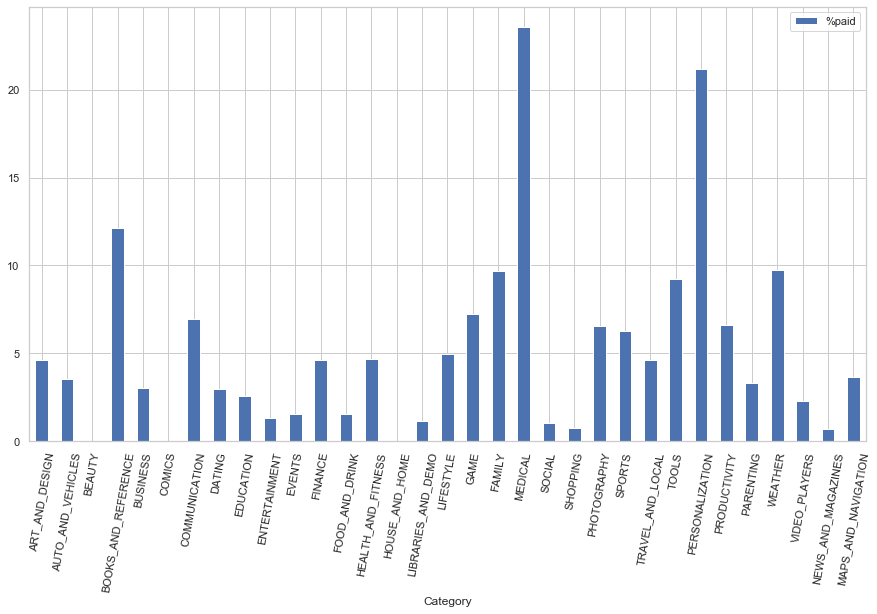

In [94]:
c = pd.DataFrame(categories)[:-1]
p = pd.DataFrame(percentages)[:-1]
category_percentages_df2 = pd.concat([c, p], axis='columns')
category_percentages_df2.columns = ['Category', '%paid']
category_percentages_df2 = category_percentages_df2.set_index('Category', drop=False)
category_percentages_df = pd.concat([c, p], axis='columns')
category_percentages_df.columns = ['Category', '%paid']
category_percentages_df = category_percentages_df.set_index('Category')
category_percentages_df.plot(kind='bar', figsize=(15, 8), rot=80)

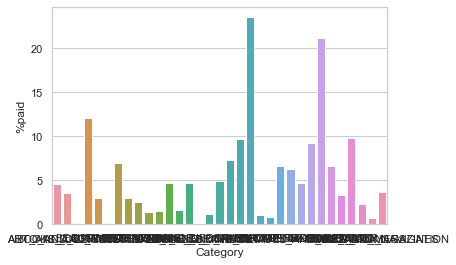

In [96]:
cp = category_percentages_df2
ax = sns.barplot(x="Category", y="%paid", data=cp)